<a href="https://colab.research.google.com/github/akshaykoul-bit/tfx-kubeflow/blob/chestxray/chestxray_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries

In [2]:
# !pip install tensorflow
# !pip install pillow
# !pip install opendatasets

# **Import libraries**

In [5]:
import numpy as np
import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(2)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import matplotlib.ticker as mticker
from sklearn.metrics import accuracy_score,classification_report
from PIL import ImageFile,Image
import opendatasets as od
import json
ImageFile.LOAD_TRUNCATED_IMAGES = True

# **Download dataset from kaggle**

In [7]:
dictionary = {"username":"xxxxxxxxxx","key":"xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"}
    
with open("kaggle.json", "w") as outfile:
  json.dump(dictionary, outfile)

od.download("https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia")

100%|██████████| 2.29G/2.29G [00:55<00:00, 44.1MB/s]


# Look at image distribution for train-test-val sets

In [11]:
data_path = '/content/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(data_path,'train')
test_dir = os.path.join(data_path,'test')
val_dir = os.path.join(data_path,'val')

labels = []
numtrain = []
numtest = []
numval = []
splitls = ['train','test','val']
for i,pths in enumerate([train_dir,test_dir,val_dir]):
    for lbl in os.listdir(pths):
      if lbl in ['NORMAL','PNEUMONIA']:
          labels.append(lbl)
          if splitls[i]=='train':
              print('train')
              print(lbl,':',len(os.listdir(pths+'/'+lbl)))
              numtrain.append(len(os.listdir(pths+'/'+lbl)))
          elif splitls[i]=='test':
              print('test')
              print(lbl,':',len(os.listdir(pths+'/'+lbl)))
              numtest.append(len(os.listdir(pths+'/'+lbl)))  
          else:
              print('val')
              print(lbl,':',len(os.listdir(pths+'/'+lbl)))
              numval.append(len(os.listdir(pths+'/'+lbl))) 

train
NORMAL : 1341
train
PNEUMONIA : 3875
test
NORMAL : 234
test
PNEUMONIA : 390
val
NORMAL : 8
val
PNEUMONIA : 8


# Visualize images

In [13]:
def viewImages(path,label,title,num,IMAGE_SIZE):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(title, fontsize=18)
    imgpath = os.path.join(path,label)
    for i,img in enumerate(os.listdir(imgpath)[:num]):
        plt.subplot(num//3,num//3,i+1)
        image = Image.open(os.path.join(imgpath,img)).resize(IMAGE_SIZE)
        plt.imshow(image)
        plt.axis("off")
    plt.tight_layout()
    plt.show() 

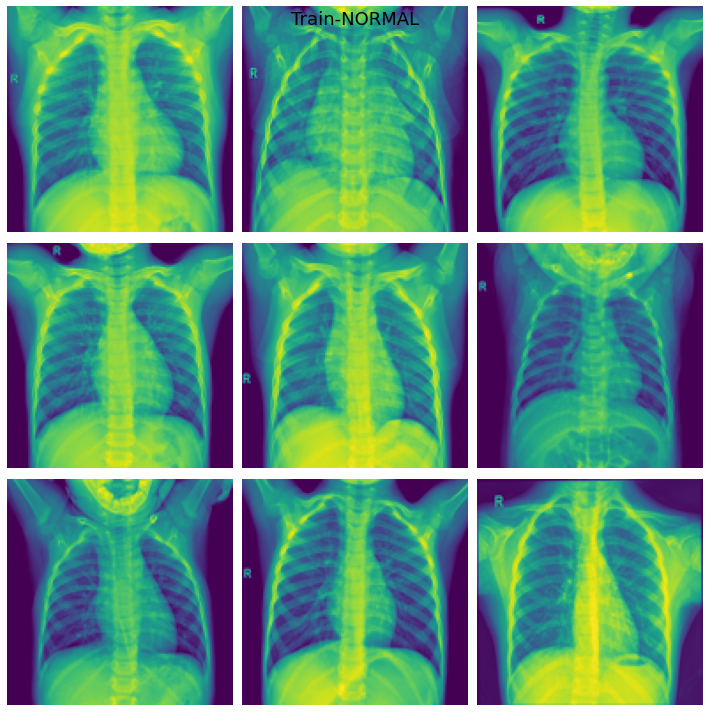

In [14]:
viewImages(train_dir,'NORMAL','Train-NORMAL',9,(128,128))

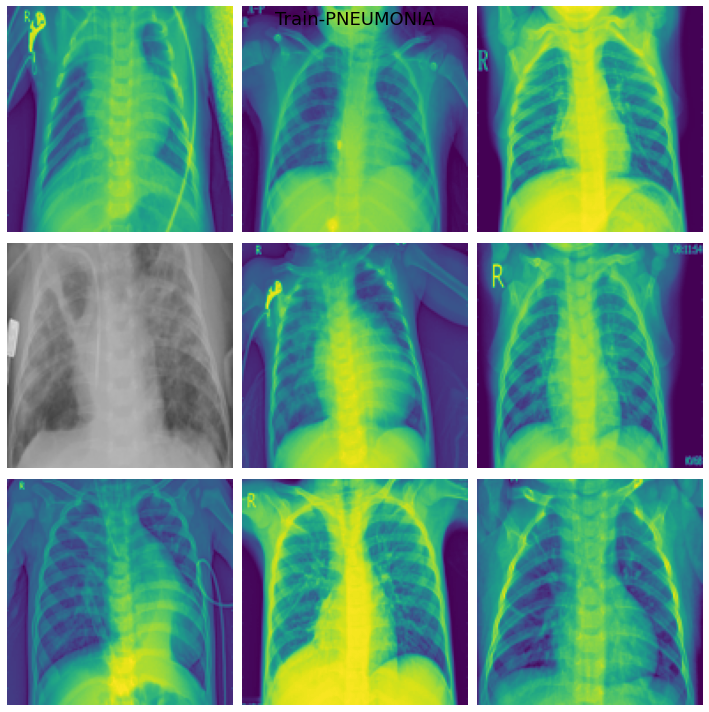

In [15]:
viewImages(train_dir,'PNEUMONIA','Train-PNEUMONIA',9,(128,128))

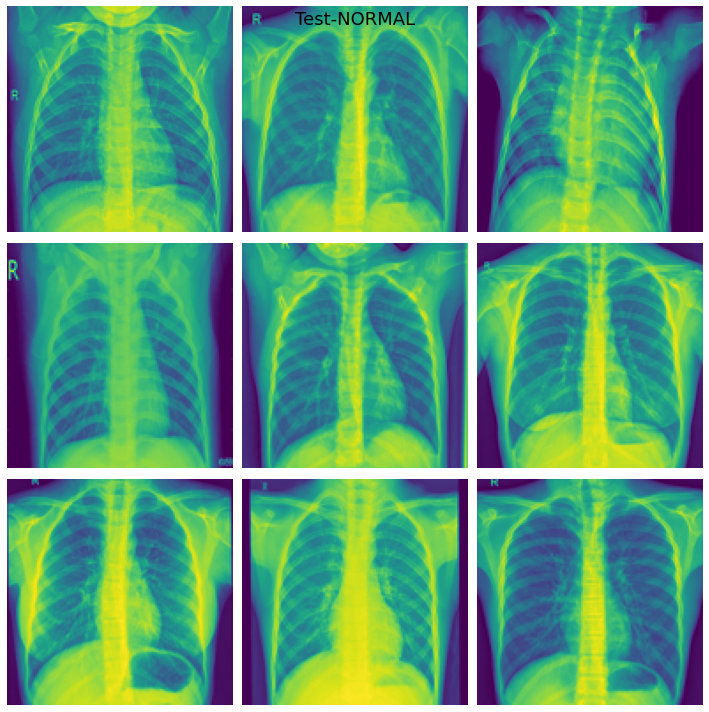

In [16]:
viewImages(test_dir,'NORMAL','Test-NORMAL',9,(128,128))

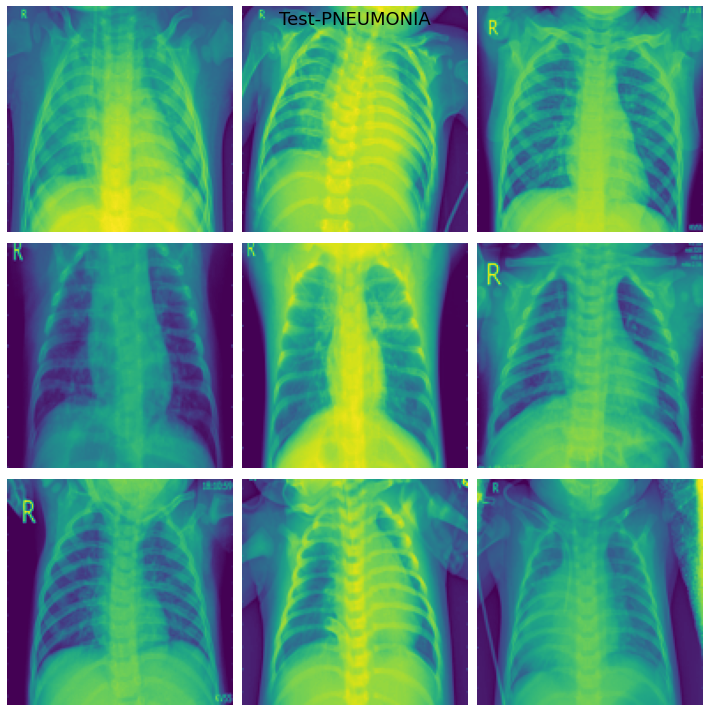

In [17]:
viewImages(test_dir,'PNEUMONIA','Test-PNEUMONIA',9,(128,128))